In [115]:
import pandas as pd
import seaborn as sns #импортируем библиотеки

In [1]:
# Загрузим датасет transaction_data.csv. Проверим размер таблицы, 
# типы переменных, число пропущенных значений и описательную статистику.

In [118]:
transaction = pd.read_csv('/home/jupyter-n-demidov-20/MINIPROJECTS/5_transaction_data.csv')

In [119]:
transaction.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [120]:
transaction.shape

(5315, 3)

In [121]:
transaction.dtypes

date           object
name           object
transaction    object
dtype: object

In [122]:
transaction.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [123]:
transaction.count()

date           5315
name           5315
transaction    5315
dtype: int64

In [124]:
transaction.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

In [125]:
# Какие значения находятся в колонке transaction? 
# Визуализируем с помощью барплота

In [126]:
df = pd.DataFrame(transaction.transaction.value_counts()).reset_index()
df

,index,transaction
0,successfull,3692
1,cancelled,1619
2,error,4


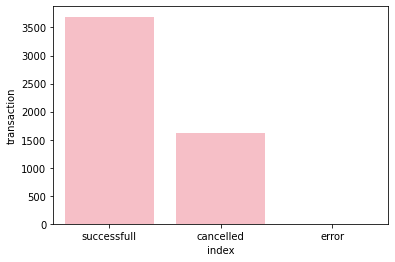

In [127]:
ax = sns.barplot(data=df, x='index', y='transaction', color='lightpink')

In [128]:
# Сколько успешных транзакций осуществил каждый из пользователей?
# Построим гистограмму распределения числа успешных транзакций.

In [129]:
successfull_transactions = transaction.query('transaction == "successfull"') \
    .groupby('name', as_index=False) \
    .agg({'transaction': 'count'})
successfull_transactions.head()

,name,transaction
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


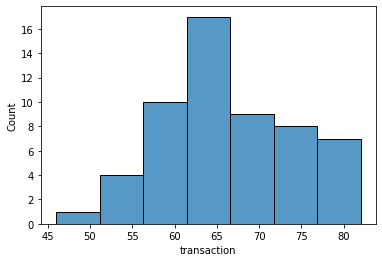

In [130]:
axx = sns.histplot(data=successfull_transactions, x='transaction')

In [131]:
successfull_transactions.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [2]:
# Построим сводную таблицу user_vs_minute_pivot, 
# где в качестве столбцов будут использованы имена пользователей, строк – минуты, 
# значений – число совершенных операций в указанную минуту


In [133]:
transaction_updated = pd.read_csv('/home/jupyter-n-demidov-20/MINIPROJECTS/5_transaction_data_updated.csv')

In [134]:
transaction_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [135]:
user_vs_minute_pivot = transaction_updated.groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(columns='name', values='transaction', index='minute') \
    .fillna(0)

In [136]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [137]:
user_vs_minute_pivot_2 = transaction_updated.pivot_table(columns='name', 
                                                         values='transaction', 
                                                         index='minute', 
                                                         aggfunc='count', 
                                                         fill_value=0)

In [138]:
user_vs_minute_pivot_2.head() == user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


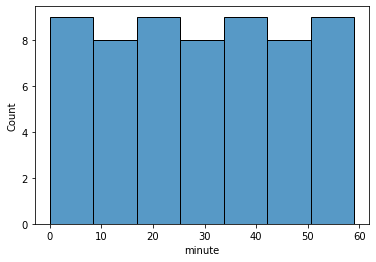

In [139]:
sns.histplot(data=user_vs_minute_pivot_2, x='minute')

In [140]:
transaction_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [ ]:
# Исправим её и сохраним правильное число минут, 
# прошедших с начала дня, в колонку true_minute.

In [145]:
transaction_updated['date'] = pd.to_datetime(transaction_updated.date)

In [153]:
transaction_updated['true_minute'] = transaction_updated.date.dt.hour * 60 + transaction_updated.minute


In [154]:
transaction_updated.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


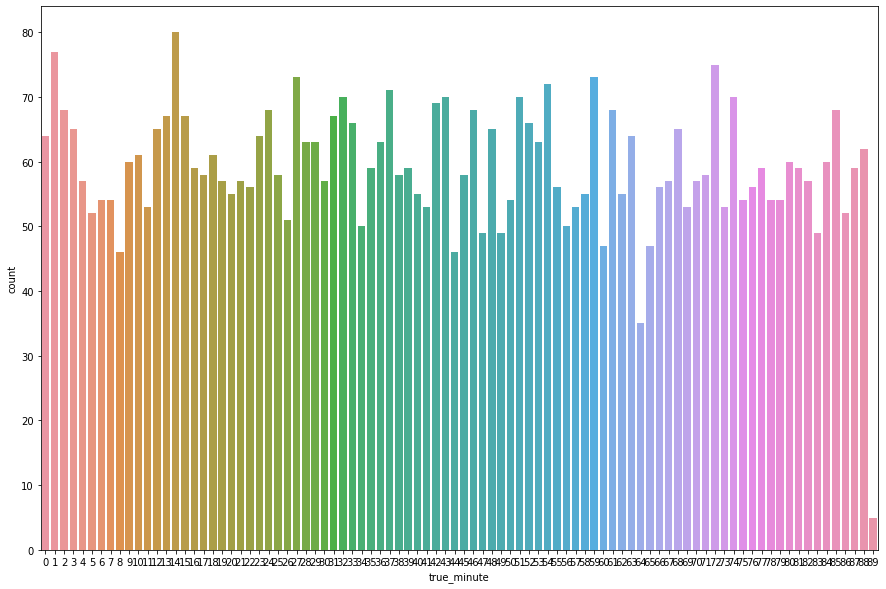

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(x='true_minute', data=transaction_updated)